# **Rent History Arlinton VA**  
### _by Alec Plante_  
06/01/2022

Description: Visualization of Historic Rent Prices in Arlinton VA

Data From: [Apartment List](https://www.apartmentlist.com/research/category/data-rent-estimates)  
https://www.apartmentlist.com/research/category/data-rent-estimates

#### Table of Contents:  
1. Imports
2. Data Manipulation
3. Data Visualization and Analysis


##### Imports  
This section outlines the necessary packages that we need to import, as well as the data

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I am importing this data from the Github repository I created. This was taken from apartmentlist.com:

In [66]:
url = "https://raw.githubusercontent.com/AlecPlante/ArlVARentPrices/main/data.csv"
data = pd.read_csv(url)

To get a good idea of what the data is, print the dataframe:

In [ ]:
print(data)

Print other aspects of the data to get a better understanding and to explore the data

In [ ]:
# Make sure that the data is imported properly
print(type(data)) # <class 'pandas.core.frame.DataFrame'>
data.loc[0][0] # First cell value, 'Birmingham, AL'
data.columns # This command prints the column names.

The columns are as follows:
- **_City_Name_**: The location. We are looking for Arlington, VA
- **_FIPS_Code_**: numbers which uniquely identify geographic areas
- **_Population_**: The number of people living in the city
- **_Bedroom_size_**: The number of bedrooms for each apartment
- **_YYYY_MM_**: the average rent price for a given year and month

##### Data Manipulation  
This section changes the data to make visualization and models easier

In [169]:
# Find where the city is equal to Arlinton, which is where I am moving.
data1 = data.loc[data["City_Name"]=="Arlington, VA"]
print(type(data1)) #ensure that the returning type is still a df
print(data1.columns) # The columns should be the same as before

<class 'pandas.core.frame.DataFrame'>
Index(['City_Name', 'FIPS_Code', 'Population', 'Bedroom_Size', '2017_01',
       '2017_02', '2017_03', '2017_04', '2017_05', '2017_06', '2017_07',
       '2017_08', '2017_09', '2017_10', '2017_11', '2017_12', '2018_01',
       '2018_02', '2018_03', '2018_04', '2018_05', '2018_06', '2018_07',
       '2018_08', '2018_09', '2018_10', '2018_11', '2018_12', '2019_01',
       '2019_02', '2019_03', '2019_04', '2019_05', '2019_06', '2019_07',
       '2019_08', '2019_09', '2019_10', '2019_11', '2019_12', '2020_01',
       '2020_02', '2020_03', '2020_04', '2020_05', '2020_06', '2020_07',
       '2020_08', '2020_09', '2020_10', '2020_11', '2020_12', '2021_01',
       '2021_02', '2021_03', '2021_04', '2021_05', '2021_06', '2021_07',
       '2021_08', '2021_09', '2021_10', '2021_11', '2021_12', '2022_01',
       '2022_02', '2022_03', '2022_04', '2022_05'],
      dtype='object')


In [171]:
## I am looking at 2 bedrooms, so I will only take the row with those
data1["Bedroom_Size"] # to view the different options for bedroom sizes
data2 = data1.loc[data["Bedroom_Size"]=="2br"] # only include 2 bedroom apts

# Drop the tables that are not rent prices. Like the poplulation, town name, etc.
data3=data2.drop(data.columns[[0,1,2,3]],axis=1)

# Get list of the column names remaining.
all_col = list(data3)

# Make these columns floats (cannot directly cast to string because of the decimal)
data3[all_col]=data3[all_col].astype(float)

# make these columns ints, to graph easier
data3.iloc[0]=data3.iloc[0].astype(int)

# Make the columns for this data as the months and the years.
data3.columns=pd.date_range("2017", freq="M",periods = 65)

# Because the columns are dates their own dates, we need to transpose to make those the rows
data3=data3.transpose()

##### Data Analysis and Visualization

We can finally plot the trend, assess the numbers

Text(0, 0.5, 'Price (USD)')

<Figure size 432x288 with 0 Axes>

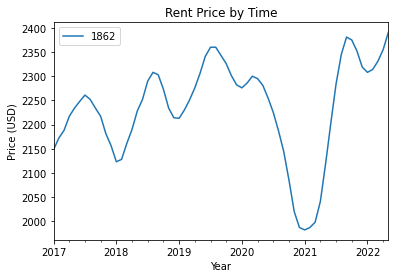

In [178]:
data3.plot()
plt.title("Rent Price by Time")
plt.xlabel("Year")
plt.ylabel("Price (USD)")

In [180]:
# find local Maxes
maxes = []
for i in range(1,len(data3)-1):
    if data3.iloc[i,0]>data3.iloc[i-1,0] and data3.iloc[i,0]>data3.iloc[i+1,0]:
        maxes.append(all_col[i])
if data3.iloc[len(data3)-1,0] > data3.iloc[len(data3)-2,0]:
    maxes.append(all_col[len(data3)-1])
print(maxes)

#Prices seem to peak around july and august. We should sign ASAP

['2017_07', '2018_08', '2020_03', '2021_09', '2022_05']


### Conclusion

After looking at the data in a graph, and looking at the max prices and when they occur, it would make the most sense if I were to try to sign for an apartment ASAP, as prices seem to peek around July and August, and I start in August.  
It is important to note that post march 2020, the data is rather unusual due to the COVID-19 Pandemic.  
Since the project was meant to be a quick refresher of some skills I already know, I kept it simple. The main idea was to get an answer of when I should sign my lease.  
There is a lot more I could add to this project if I were to continue it. For instance:
- Develop a prediction model using an ARIMA Model. This would need more datapoints.
- Look at the 1 bedroom and overall rent prices.
- Create other visualizations.
- Explore trends in other cities.  
These are just some ideas that I had, but since I acheived my goal of finding the best time to move in, I will be moving on to other projects and signing a lease. Thank you for viewing!